This notebook was created by Donna Faith Go.

In [1]:
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
help(DTW)

Help on class DTW in module dtw.dtw:

class DTW(builtins.object)
 |  DTW(obj)
 |
 |  The results of an alignment operation.
 |
 |  Objects of class DTW contain alignments computed by the [dtw()]
 |  function.
 |
 |  **Attributes:**
 |
 |  - ``distance`` the minimum global distance computed, *not* normalized.
 |  - ``normalizedDistance`` distance computed, *normalized* for path
 |    length, if normalization is known for chosen step pattern.
 |  - ``N,M`` query and reference length
 |  - ``call`` the function call that created the object
 |  - ``index1`` matched elements: indices in ``x``
 |  - ``index2`` corresponding mapped indices in ``y``
 |  - ``stepPattern`` the ``stepPattern`` object used for the computation
 |  - ``jmin`` last element of reference matched, if ``open_end=True``
 |  - ``directionMatrix`` if ``keep_internals=True``, the directions of
 |    steps that would be taken at each alignment pair (integers indexing
 |    production rules in the chosen step pattern)
 |  - ``

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 2) + inhomogeneous part.

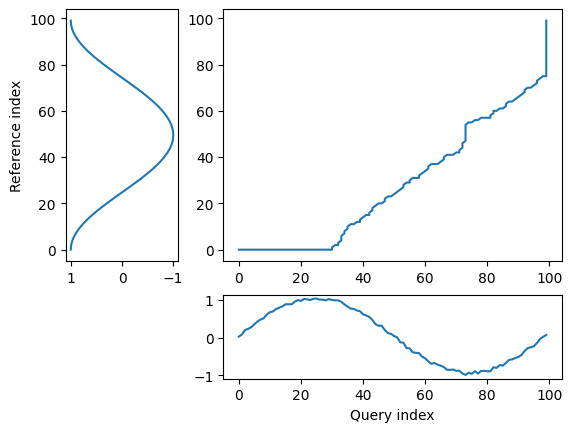

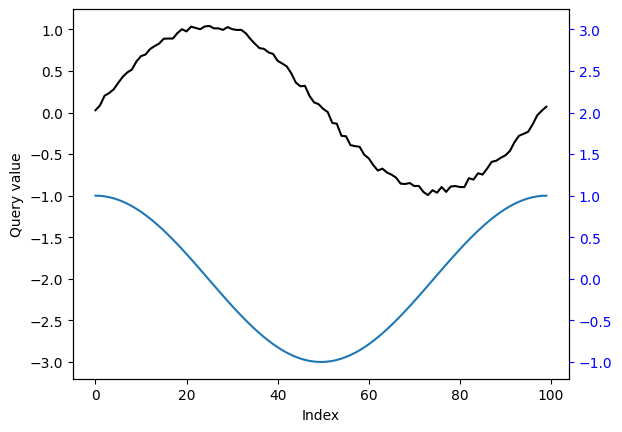

In [3]:
import numpy as np

## A noisy sine wave as query
idx = np.linspace(0,6.28,num=100)
query = np.sin(idx) + np.random.uniform(size=100)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx)

## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

## Align and plot with the Rabiner-Juang type VI-c unsmoothed recursion
dtw(query, template, keep_internals=True, 
    step_pattern=rabinerJuangStepPattern(6, "c"))\
    .plot(type="twoway",offset=-2)

## See the recursion relation, as formula and diagram
print(rabinerJuangStepPattern(6,"c"))
rabinerJuangStepPattern(6,"c").plot()